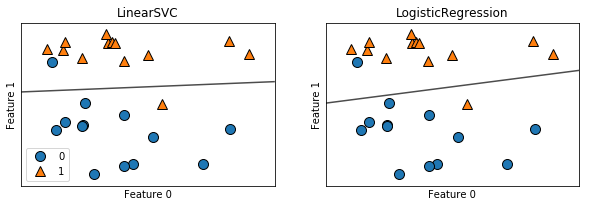

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
from matplotlib import pyplot as plt


X, y = mglearn.datasets.make_forge()

fig , axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax = ax, alpha=.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

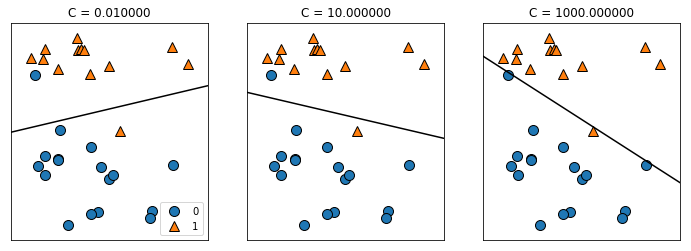

In [4]:
# LinearSVC()、 LogisticRegression() の正則化を強度を決定するパラメータを C と呼び
# Cが大きくなるほど,正則化は弱くなる
# Cを小さくすると、データポイントの大多数に対して適用しようとするが、大きいCを用いると、個々のデーアポイントを正確に分類するようになる
mglearn.plots.plot_linear_svc_regularization()

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,  cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
# デフォルトのC=1の場合。
# 訓練セットとテストセットの精度がとても近い、これは適合不足があるかもしれない。
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9553990610328639
0.958041958041958


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,  cancer.target, stratify=cancer.target, random_state=42)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
# デフォルトのC=10の場合。
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.971830985915493
0.965034965034965


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,  cancer.target, stratify=cancer.target, random_state=42)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
# 強力に正則化したモデル。
# デフォルトのC=0.01の場合。
print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

0.9342723004694836
0.9300699300699301


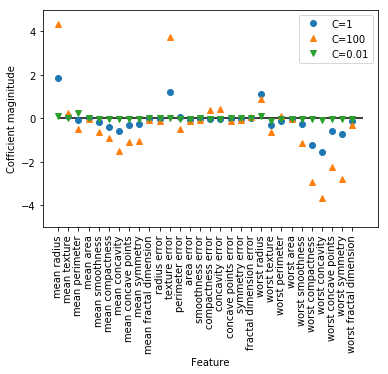

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,  cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

# 学習された係数を確認する

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0 , cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Cofficient maginitude")
plt.legend()
plt.show()

Training accuracy: 0.0010.9131455399061033
Test accuracy: 0.0010.9230769230769231
Training accuracy: 10.960093896713615
Test accuracy: 10.958041958041958
Training accuracy: 1000.9859154929577465
Test accuracy: 1000.9790209790209791


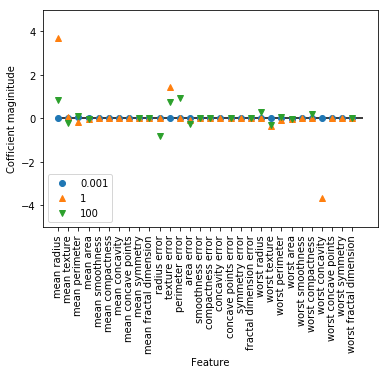

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,  cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy: " + str(C) + str(lr_l1.score(X_train, y_train)))
    print("Test accuracy: " + str(C) + str(lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label=str(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0 , cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Cofficient maginitude")
plt.legend(loc=3)
plt.show()

/Users/takaaki-suzuki/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


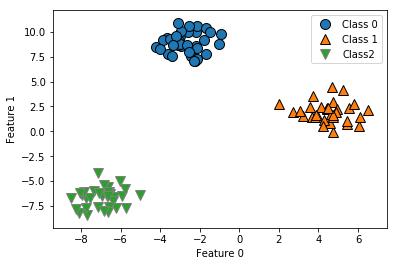

In [7]:
# 線形分類による多分類
from sklearn.datasets import make_blobs
import mglearn
from matplotlib import pyplot as plt

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class2"])
plt.show()

Cofficient: (3, 2)
Intercept: (3,)


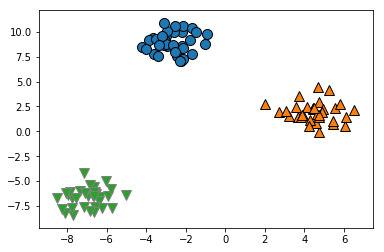

In [9]:
from sklearn.datasets import make_blobs
import mglearn
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

liner_svc = LinearSVC().fit(X, y)
print("Cofficient: " + str(liner_svc.coef_.shape))
print("Intercept: " + str(liner_svc.intercept_.shape))

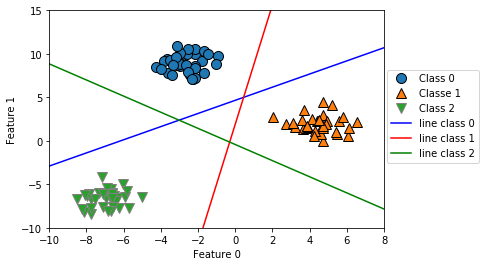

In [11]:
from sklearn.datasets import make_blobs
import mglearn
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
liner_svc = LinearSVC().fit(X, y)

for coef, intercept, color in zip(liner_svc.coef_, liner_svc.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

    
# 領域的に重なる部分はその他になってしまうため、2次元空間全ての点に対する予測をする必要がある
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Classe 1', 'Class 2', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01, 0.3))

ValueError: operands could not be broadcast together with shapes (50,) (2,) 

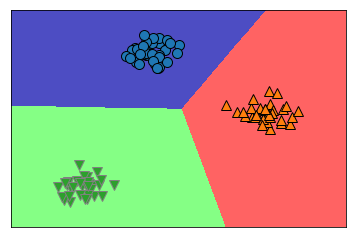

In [14]:
from sklearn.datasets import make_blobs
import mglearn
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np

X, y = make_blobs(random_state = 42)
line = np.linspace(-15, 15)
liner_svc = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_classification(liner_svc, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

for coef, intercept, color in (liner_svc.coef_, liner_svc.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -1 * (line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Classe 1', 'Class 2', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01, 0.3))